<a href="https://colab.research.google.com/github/ahmadfahrultamimi15/epoch-5-20-80/blob/main/tes2epoch10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***SCRAPING DATA***

In [1]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00


In [2]:
from google_play_scraper import app, reviews
import pandas as pd
import datetime

In [3]:
from google_play_scraper import reviews, Sort
from datetime import datetime

app_id = 'app.bpjs.mobile'

def get_reviews(app_id, lang='id', count=10000, sort=Sort.NEWEST, filter_score_with=None, filter_device_with=None, continuation_token=None):
  try:
    result, continuation_token = reviews(
        app_id,
        lang=lang,
        country='id',
        sort=sort,
        count=count,
        filter_score_with=filter_score_with,
        filter_device_with=filter_device_with,
        continuation_token=continuation_token
    )
    return result, continuation_token
  except Exception as e:
    print("Error:", e)
    return None, None

reviews, continuation_token = get_reviews(app_id)

if reviews is not None:
  print("Jumlah Ulasan:", len(reviews))
  if len(reviews) > 0:
    print("Contoh Ulasan:")
    print(reviews[0])
else:
  print("Tidak dapat mengambil ulasan.")

Jumlah Ulasan: 10000
Contoh Ulasan:
{'reviewId': '02f46413-8b24-44ee-9878-bf9cbf5304d5', 'userName': 'Pengguna Google', 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g', 'content': 'sangat berguna untuk mengubah data', 'score': 5, 'thumbsUpCount': 0, 'reviewCreatedVersion': '4.15.0', 'at': datetime.datetime(2026, 2, 6, 15, 35, 36), 'replyContent': None, 'repliedAt': None, 'appVersion': '4.15.0'}


In [4]:
import csv

def export_to_csv(reviews, file_name='Hasil scraper ulasan aplikasi Jkn Mobile.csv'):
  if reviews:
    fieldnames = ['Review ID', 'Username', 'rating', 'Review Text', 'Date']

    with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()

        for review in reviews:
            writer.writerow({
                'Review ID': review['reviewId'],
                'Username': review['userName'],
                'rating': review['score'],
                'Review Text': review['content'],
                'Date': review['at']
            })

    print(f"Data berhasil disimpan dalam file CSV: {file_name}")
  else:
    print("Tidak ada data untuk disimpan.")

export_to_csv(reviews)

Data berhasil disimpan dalam file CSV: Hasil scraper ulasan aplikasi Jkn Mobile.csv


In [5]:
import pandas as pd

data = pd.read_csv("Hasil scraper ulasan aplikasi Jkn Mobile.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    10000 non-null  object
 1   Username     10000 non-null  object
 2   rating       10000 non-null  int64 
 3   Review Text  10000 non-null  object
 4   Date         10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [6]:
data.head(20)

,Review ID,Username,rating,Review Text,Date
0,02f46413-8b24-44ee-9878-bf9cbf5304d5,Pengguna Google,5,sangat berguna untuk mengubah data,2026-02-06 15:35:36
1,e8e093b1-f4e9-4392-99b8-dbf414035424,Pengguna Google,5,good,2026-02-06 15:08:50
2,2f0e5fc2-959c-4738-bd56-872c7eaf174d,Pengguna Google,1,sangat tak berguna,2026-02-06 15:08:48
3,46ea6f37-3c36-4eb8-959a-30377c91bced,Pengguna Google,5,bagus banget,2026-02-06 15:05:58
4,866ef3c3-95d2-41fe-99f1-522758152729,Pengguna Google,5,good,2026-02-06 15:03:13
5,db0e271b-3393-4984-a16c-c4d1685d9906,Pengguna Google,5,sangat membantu,2026-02-06 14:31:37
6,535c27d8-797f-4c65-92a4-ad6c5c4a3a42,Pengguna Google,1,Aplikasi performa jelek,2026-02-06 14:15:37
7,d16eda22-f886-4562-9654-769fca282d0f,Pengguna Google,1,"Kalau sekiranya belum siap secara digital, apa...",2026-02-06 14:08:06
8,131c069b-5f88-4773-9a3d-9a0f88a995f9,Pengguna Google,5,Aplikasi yg sangat membantu,2026-02-06 14:07:57
9,5e701d65-d79a-4344-b903-8c0c0da0ade5,Pengguna Google,1,semenjak update januari 2026 nggak bisa masuk ...,2026-02-06 14:07:46


**PREPROCESSING DATA**

In [7]:
import pandas as pd

data = pd.read_csv("Hasil scraper ulasan aplikasi Jkn Mobile.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    10000 non-null  object
 1   Username     10000 non-null  object
 2   rating       10000 non-null  int64 
 3   Review Text  10000 non-null  object
 4   Date         10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [8]:
data.head(5)

,Review ID,Username,rating,Review Text,Date
0,02f46413-8b24-44ee-9878-bf9cbf5304d5,Pengguna Google,5,sangat berguna untuk mengubah data,2026-02-06 15:35:36
1,e8e093b1-f4e9-4392-99b8-dbf414035424,Pengguna Google,5,good,2026-02-06 15:08:50
2,2f0e5fc2-959c-4738-bd56-872c7eaf174d,Pengguna Google,1,sangat tak berguna,2026-02-06 15:08:48
3,46ea6f37-3c36-4eb8-959a-30377c91bced,Pengguna Google,5,bagus banget,2026-02-06 15:05:58
4,866ef3c3-95d2-41fe-99f1-522758152729,Pengguna Google,5,good,2026-02-06 15:03:13


In [9]:
df = pd.DataFrame(data[['rating','Review Text']])
df.head(5)

,rating,Review Text
0,5,sangat berguna untuk mengubah data
1,5,good
2,1,sangat tak berguna
3,5,bagus banget
4,5,good


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rating       10000 non-null  int64 
 1   Review Text  10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [11]:
df.drop_duplicates(subset='Review Text', keep= 'first', inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7288 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rating       7288 non-null   int64 
 1   Review Text  7288 non-null   object
dtypes: int64(1), object(1)
memory usage: 170.8+ KB


# **PROSES CLEANING**

In [13]:
import re
import string
import nltk

# fungsi untuk menghapus URL
def remove_URL(tweet):
  if tweet is not None and isinstance(tweet, str):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)
  else:
    return tweet

# fungsi untuk menghapus HTML
def remove_html(tweet):
  if tweet is not None and isinstance(tweet, str):
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)
  else:
    return tweet

# fungsi untuk menghapus emoji
def remove_emoji(tweet):
  if tweet is not None and isinstance(tweet, str):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"   # simbol & piktograf
        u"\U0001F680-\U0001F6FF"   # transfort & Map simbol
        u"\U0001F700-\U0001F77F"   # alchemical simbol
        u"\U0001F780-\U0001F7FF"   # geometrik shape extended
        u"\U0001F800-\U0001F8FF"   # supplemental arrows C
        u"\U0001F900-\U0001F9FF"   # supplemental simbol dan pictographs
        u"\U0001FA00-\U0001FA6F"   # Chess simbol
        u"\U0001FA70-\U0001FAFF"   # simbol & pictographs extended
        u"\U0001F004-\U0001F0CF"   # Additional emoticon
        u"\U0001F1E0-\U0001F1FF"   # Flags
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)
  else:
    return tweet

#fungsi untuk menghapus simbol
def remove_symbols(tweet):
  if tweet is not None and isinstance(tweet, str):
    # This function should remove non-alphanumeric and non-whitespace characters (symbols).
    # '\W' matches any non-alphanumeric character. '_ ' is explicitly removed if needed.
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet) # Removes non-alphanumeric/non-whitespace characters
  return tweet

#fungsi untuk menghapus angka
def remove_numbers(tweet):
  if tweet is not None and isinstance(tweet, str):
    tweet = re.sub(r'\d', '', tweet)
  return tweet

#fungsi hapus username
def remove_usernames(tweet):
  if tweet is not None and isinstance(tweet, str):
    tweet = re.sub(r'@\w+', '', tweet)
  return tweet

df['cleaning'] = df['Review Text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_usernames(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(5)

,rating,Review Text,cleaning
0,5,sangat berguna untuk mengubah data,sangat berguna untuk mengubah data
1,5,good,good
2,1,sangat tak berguna,sangat tak berguna
3,5,bagus banget,bagus banget
5,5,sangat membantu,sangat membantu


# **PROSES CASE FOLDING**

In [14]:
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,rating,Review Text,cleaning,case_folding
0,5,sangat berguna untuk mengubah data,sangat berguna untuk mengubah data,sangat berguna untuk mengubah data
1,5,good,good,good
2,1,sangat tak berguna,sangat tak berguna,sangat tak berguna
3,5,bagus banget,bagus banget,bagus banget
5,5,sangat membantu,sangat membantu,sangat membantu


# **NORMALISASI KATA**

In [15]:
import pandas as pd
import requests
from io import BytesIO

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

# Baca dataset(PASTIKAN DF SUDAH TERSEDIA)
data = pd.DataFrame(df[['rating','Review Text', 'cleaning', 'case_folding']])
data.head()

,rating,Review Text,cleaning,case_folding
0,5,sangat berguna untuk mengubah data,sangat berguna untuk mengubah data,sangat berguna untuk mengubah data
1,5,good,good,good
2,1,sangat tak berguna,sangat tak berguna,sangat tak berguna
3,5,bagus banget,bagus banget,bagus banget
5,5,sangat membantu,sangat membantu,sangat membantu


In [16]:
#unduh dan baca kamus dari github
url = "https://github.com/analysisdatasentiment/kamus_kata_baku/raw/main/kamuskatabaku.xlsx"
response = requests.get(url)
file_excel = BytesIO(response.content)
kamus_data = pd.read_excel(file_excel)
# buat dictionary dari kamus
kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [17]:
# Terapkan fungsi normalisasi
data[['normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']] = data['case_folding'].apply(
    lambda x: pd.Series(replace_taboo_words(x, kamus_tidak_baku_dict))
)

#ambil kolom yang relevan
df = pd.DataFrame(data[['rating','Review Text','cleaning','case_folding', 'normalisasi']])
df.head(5)

,rating,Review Text,cleaning,case_folding,normalisasi
0,5,sangat berguna untuk mengubah data,sangat berguna untuk mengubah data,sangat berguna untuk mengubah data,sangat berguna untuk mengubah data
1,5,good,good,good,good
2,1,sangat tak berguna,sangat tak berguna,sangat tak berguna,sangat tak berguna
3,5,bagus banget,bagus banget,bagus banget,bagus banget
5,5,sangat membantu,sangat membantu,sangat membantu,sangat membantu


# **TOKENIZATION**

In [18]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)
df.head(5)

,rating,Review Text,cleaning,case_folding,normalisasi,tokenize
0,5,sangat berguna untuk mengubah data,sangat berguna untuk mengubah data,sangat berguna untuk mengubah data,sangat berguna untuk mengubah data,"[sangat, berguna, untuk, mengubah, data]"
1,5,good,good,good,good,[good]
2,1,sangat tak berguna,sangat tak berguna,sangat tak berguna,sangat tak berguna,"[sangat, tak, berguna]"
3,5,bagus banget,bagus banget,bagus banget,bagus banget,"[bagus, banget]"
5,5,sangat membantu,sangat membantu,sangat membantu,sangat membantu,"[sangat, membantu]"


# **STOPWORD REMOVAL**

In [19]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df.head(20)

,rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,5,sangat berguna untuk mengubah data,sangat berguna untuk mengubah data,sangat berguna untuk mengubah data,sangat berguna untuk mengubah data,"[sangat, berguna, untuk, mengubah, data]","[berguna, mengubah, data]"
1,5,good,good,good,good,[good],[good]
2,1,sangat tak berguna,sangat tak berguna,sangat tak berguna,sangat tak berguna,"[sangat, tak, berguna]",[berguna]
3,5,bagus banget,bagus banget,bagus banget,bagus banget,"[bagus, banget]","[bagus, banget]"
5,5,sangat membantu,sangat membantu,sangat membantu,sangat membantu,"[sangat, membantu]",[membantu]
6,1,Aplikasi performa jelek,Aplikasi performa jelek,aplikasi performa jelek,aplikasi performa jelek,"[aplikasi, performa, jelek]","[aplikasi, performa, jelek]"
7,1,"Kalau sekiranya belum siap secara digital, apa...",Kalau sekiranya belum siap secara digital apaa...,kalau sekiranya belum siap secara digital apaa...,kalau sekiranya belum siap secara digital apaa...,"[kalau, sekiranya, belum, siap, secara, digita...","[digital, apaapa, dialihin, layanan, digital, ..."
8,5,Aplikasi yg sangat membantu,Aplikasi yg sangat membantu,aplikasi yg sangat membantu,aplikasi yang sangat membantu,"[aplikasi, yang, sangat, membantu]","[aplikasi, membantu]"
9,1,semenjak update januari 2026 nggak bisa masuk ...,semenjak update januari nggak bisa masuk ke p...,semenjak update januari nggak bisa masuk ke p...,semenjak update januari tidak bisa masuk ke pe...,"[semenjak, update, januari, tidak, bisa, masuk...","[semenjak, update, januari, masuk, pendaftaran..."
10,5,"sebelumnya emang gk punya bpjs,, saya coba daf...",sebelumnya emang gk punya bpjs saya coba dafta...,sebelumnya emang gk punya bpjs saya coba dafta...,sebelumnya memang tidak punya bpjs saya coba d...,"[sebelumnya, memang, tidak, punya, bpjs, saya,...","[bpjs, coba, daftar, jkn, mobile, hasilnya, ak..."


# **STEAMING DATA**

In [21]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.9 MB/s eta 0:00:00


In [22]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['stemming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data
0,5,sangat berguna untuk mengubah data,sangat berguna untuk mengubah data,sangat berguna untuk mengubah data,sangat berguna untuk mengubah data,"[sangat, berguna, untuk, mengubah, data]","[berguna, mengubah, data]",guna ubah data
1,5,good,good,good,good,[good],[good],good
2,1,sangat tak berguna,sangat tak berguna,sangat tak berguna,sangat tak berguna,"[sangat, tak, berguna]",[berguna],guna
3,5,bagus banget,bagus banget,bagus banget,bagus banget,"[bagus, banget]","[bagus, banget]",bagus banget
5,5,sangat membantu,sangat membantu,sangat membantu,sangat membantu,"[sangat, membantu]",[membantu],bantu


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7288 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            7288 non-null   int64 
 1   Review Text       7288 non-null   object
 2   cleaning          7288 non-null   object
 3   case_folding      7288 non-null   object
 4   normalisasi       7288 non-null   object
 5   tokenize          7288 non-null   object
 6   stopword removal  7288 non-null   object
 7   stemming_data     7288 non-null   object
dtypes: int64(1), object(7)
memory usage: 512.4+ KB


# **PROSES HAPUS DATA  BERNILAI KOSONG**

In [24]:
data = df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7288 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            7288 non-null   int64 
 1   Review Text       7288 non-null   object
 2   cleaning          7288 non-null   object
 3   case_folding      7288 non-null   object
 4   normalisasi       7288 non-null   object
 5   tokenize          7288 non-null   object
 6   stopword removal  7288 non-null   object
 7   stemming_data     7288 non-null   object
dtypes: int64(1), object(7)
memory usage: 512.4+ KB


# **WORDCLOUD SETELAH PREPROCESING**

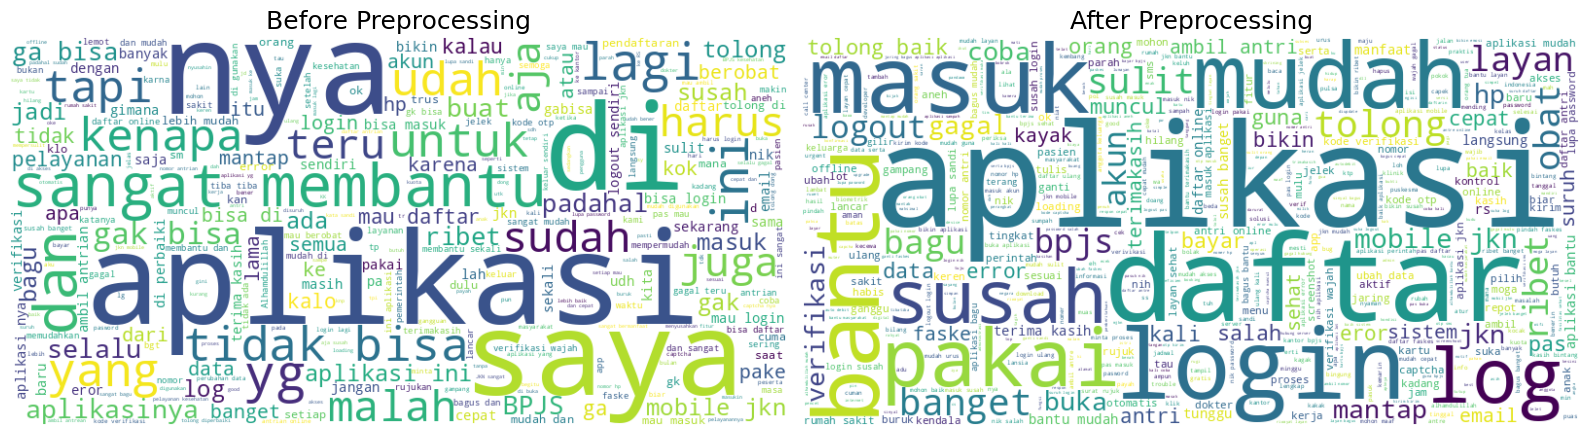

In [25]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#buat stopword tambahan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue', 'sih', 'update', 'apk'])

#wordcloud before (dari kolom 'Review Text')
text_before = ' '.join(data['Review Text'].astype(str).tolist())
wc_before = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400).generate(text_before)

#wordcloud after (dari kolom 'stemming data')
text_after = ' '.join(data['stemming_data'].astype(str).tolist())
wc_after = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400).generate(text_after)

# visualisai side by-side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wc_before, interpolation='bilinear')
plt.axis("off")
plt.title("Before Preprocessing", fontsize=18)

plt.subplot(1, 2, 2)
plt.imshow(wc_after, interpolation='bilinear')
plt.axis("off")
plt.title("After Preprocessing", fontsize=18)

plt.tight_layout()
plt.show()


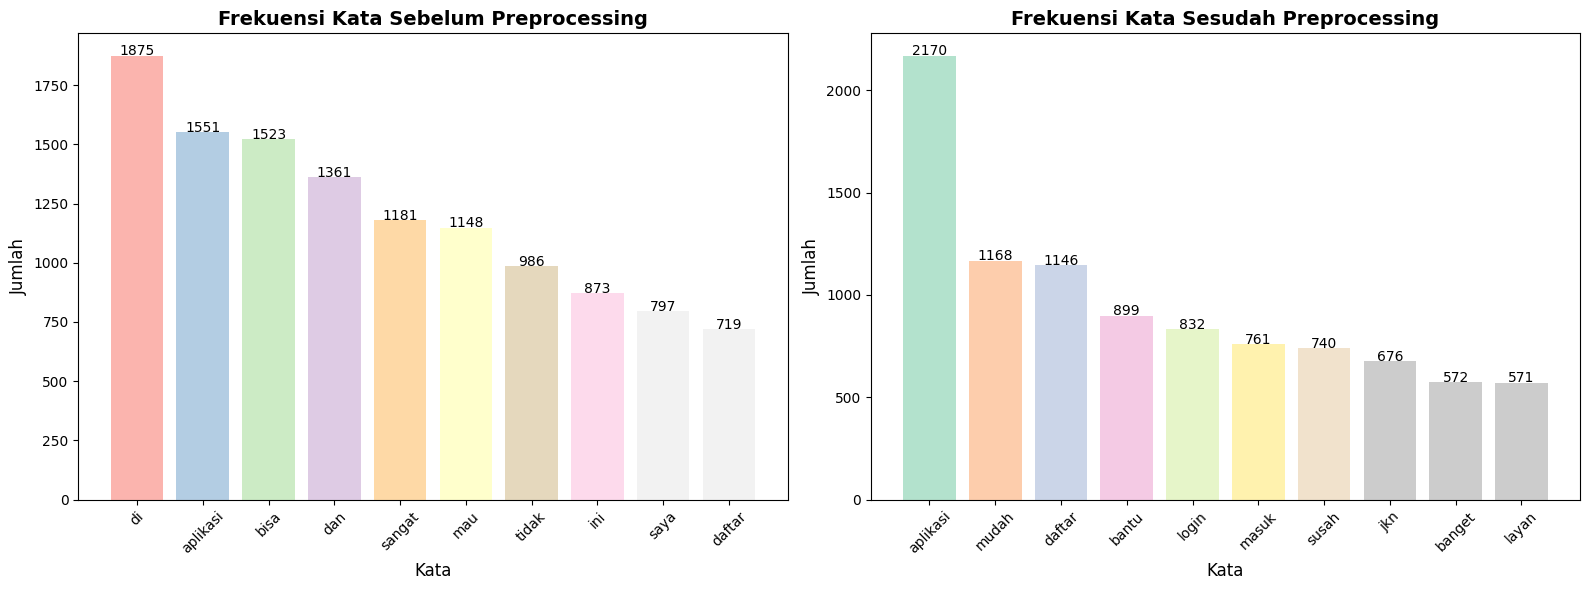

In [26]:
from matplotlib import axes
from collections import Counter
from wordcloud import STOPWORDS

#set Stopword tambhan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue',
                  'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga', 'update', 'apk'])

#Before: Kolom "Review Text"
all_text_before = ' '.join(data["Review Text"].astype(str))
words_before = all_text_before.split()
filtered_words_before = [word for word in words_before if word.lower() not in stopwords]
word_counts_before = Counter(filtered_words_before)
top_words_before = word_counts_before.most_common(10)
word_before, count_before = zip(*top_words_before)

#after: kolom stemming data
all_text_after = ' '.join(data["stemming_data"].astype(str))
words_after = all_text_after.split()
filtered_words_after = [word for word in words_after if word.lower() not in stopwords]
word_counts_after = Counter(filtered_words_after)
top_words_after = word_counts_after.most_common(10)
word_after, count_after = zip(*top_words_after)

# Plot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BEFORE plot
colors_before = plt.cm.Pastel1(range(len(word_before)))
bars1 = axes[0].bar(word_before, count_before, color=colors_before)
axes[0].set_title("Frekuensi Kata Sebelum Preprocessing", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Kata", fontsize=12)
axes[0].set_ylabel("Jumlah", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for bar, count in zip(bars1, count_before):
    axes[0].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

# AFTER plot
colors_after = plt.cm.Pastel2(range(len(word_after)))
bars2 = axes[1].bar(word_after, count_after, color=colors_after)
axes[1].set_title("Frekuensi Kata Sesudah Preprocessing", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Kata", fontsize=12)
axes[1].set_ylabel("Jumlah", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
for bar, count in zip(bars2, count_after):
    axes[1].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

plt.tight_layout()
plt.show()


In [27]:
df.to_csv('Hasil_Preprocessing_Data.csv', encoding='utf8', index=False);

**PELABELAN DATA**

In [28]:
import pandas as pd

data = pd.read_csv('Hasil_Preprocessing_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7288 entries, 0 to 7287
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            7288 non-null   int64 
 1   Review Text       7288 non-null   object
 2   cleaning          7264 non-null   object
 3   case_folding      7264 non-null   object
 4   normalisasi       7261 non-null   object
 5   tokenize          7288 non-null   object
 6   stopword removal  7288 non-null   object
 7   stemming_data     7224 non-null   object
dtypes: int64(1), object(7)
memory usage: 455.6+ KB


In [29]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7224 entries, 0 to 7287
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            7224 non-null   int64 
 1   Review Text       7224 non-null   object
 2   cleaning          7224 non-null   object
 3   case_folding      7224 non-null   object
 4   normalisasi       7224 non-null   object
 5   tokenize          7224 non-null   object
 6   stopword removal  7224 non-null   object
 7   stemming_data     7224 non-null   object
dtypes: int64(1), object(7)
memory usage: 507.9+ KB


In [30]:
data = pd.DataFrame(data[['stemming_data']])
data.head(5)

,stemming_data
0,guna ubah data
1,good
2,guna
3,bagus banget
4,bantu


In [31]:
import pandas as pd
import numpy as np

# Unduh kamus leksikon positif dan negatif dari Github
positive_url = "https://raw.githubusercontent.com/fajri91/Inset/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/Inset/master/negative.tsv"

positive_lexicon = set(pd.read_csv(positive_url, sep='\t', header=None) [0])
negative_lexicon = set(pd.read_csv(negative_url, sep='\t', header=None) [0])

# Fungsi untuk menentukan sentimen dan menghitung skornya
def determine_sentiment(text):
    if isinstance(text, str):
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)
        sentiment_score = positive_count - negative_count
        if sentiment_score > 0:
            sentiment = 'Positif'
        elif sentiment_score < 0:
            sentiment = 'Negatif'
        else:
            sentiment = 'Netral'
        return sentiment_score, sentiment
    return 0, "Netral"

# Tentukan sentimen dan skor untuk setiap ulasan
data[['score','Sentiment']] = data['stemming_data'].apply(lambda x: pd.Series(determine_sentiment(x)))

data.head(5)

,stemming_data,score,Sentiment
0,guna ubah data,0,Netral
1,good,1,Positif
2,guna,1,Positif
3,bagus banget,1,Positif
4,bantu,0,Netral


/tmp/ipython-input-416596458.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


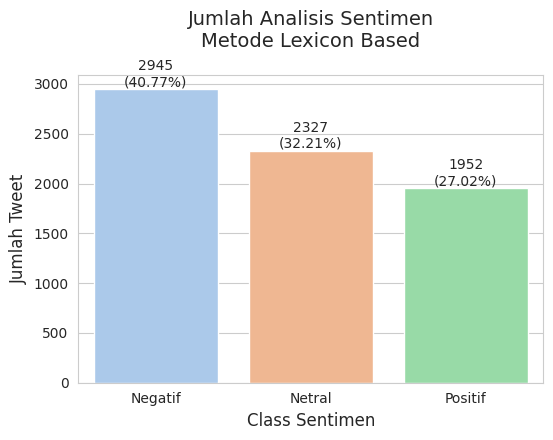

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['Sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen\nMetode Lexicon Based', fontsize=14, pad=20)
plt.xlabel('Class Sentimen', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [33]:
data.to_csv('Hasil_Labeling_Data.csv', encoding='utf8', index=False);

SPLITING DATA

In [34]:
import pandas as pd

# Load the dataset
file_path = 'Hasil_Labeling_Data.csv'
data = pd.read_csv(file_path)

# Display the first few Rows of the dataset to understand its structur
data.head()

,stemming_data,score,Sentiment
0,guna ubah data,0,Netral
1,good,1,Positif
2,guna,1,Positif
3,bagus banget,1,Positif
4,bantu,0,Netral


In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


# Extracting relevant colums
texts = data['stemming_data'].astype(str).values
labels = data['Sentiment'].values

# Encoding labels into numeric values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)


In [36]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, encoded_labels, test_size=0.2, random_state=42)

print(f"Training Data Size: {len(X_train)}")
print(f"Testing Data Size: {len(X_test)}")

Training Data Size: 5779
Testing Data Size: 1445


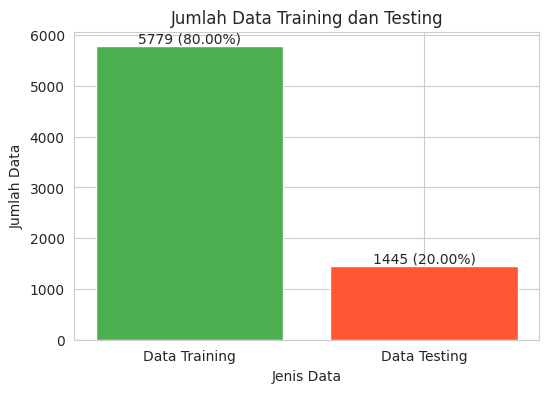

In [37]:
# Encode Labels
le = LabelEncoder()
Y = encoded_labels
Y = le.fit_transform(Y)
X = texts

train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['#4CAF50', '#FF5733'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Training dan Testing')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()



***PENERAPAN MODEL LSTM (Embedding )***

In [38]:
!pip install tensorflow

# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
x_train_seq = tokenizer.texts_to_sequences(X_train)
x_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
max_len = 100
x_train_pad = pad_sequences(x_train_seq, maxlen=max_len, padding='post', truncating='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len, padding='post', truncating='post')

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Model Building
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [39]:
# Train the model
history = model.fit(x_train_pad, y_train, epochs=10, batch_size=32, validation_data=(x_test_pad, y_test))

# Evaluate the model
y_pred = model.predict(x_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

Epoch 1/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 41s 171ms/step - accuracy: 0.5337 - loss: 0.9470 - val_accuracy: 0.8637 - val_loss: 0.3714
Epoch 2/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 33s 129ms/step - accuracy: 0.8926 - loss: 0.3069 - val_accuracy: 0.9114 - val_loss: 0.2512
Epoch 3/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 23s 130ms/step - accuracy: 0.9607 - loss: 0.1186 - val_accuracy: 0.9183 - val_loss: 0.2594
Epoch 4/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.9765 - loss: 0.0780 - val_accuracy: 0.9107 - val_loss: 0.3231
Epoch 5/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 43s 139ms/step - accuracy: 0.9812 - loss: 0.0585 - val_accuracy: 0.9170 - val_loss: 0.3946
Epoch 6/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 23s 129ms/step - accuracy: 0.9874 - loss: 0.0446 - val_accuracy: 0.9149 - val_loss: 0.3467
Epoch 7/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 24s 130ms/step - accuracy: 0.9860 - loss: 0.0446 - val_accuracy: 0.9329 - val_loss: 0.3064
Epoch 8/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 24s 130ms/step - accuracy: 0.9951 - loss: 0

In [40]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print()

# Classification report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print(report)


Accuracy: 0.9155709342560554
Accuracy: 91.56%

              precision    recall  f1-score   support

     Negatif       0.96      0.91      0.93       594
      Netral       0.83      0.92      0.87       440
     Positif       0.95      0.93      0.94       411

    accuracy                           0.92      1445
   macro avg       0.92      0.92      0.92      1445
weighted avg       0.92      0.92      0.92      1445



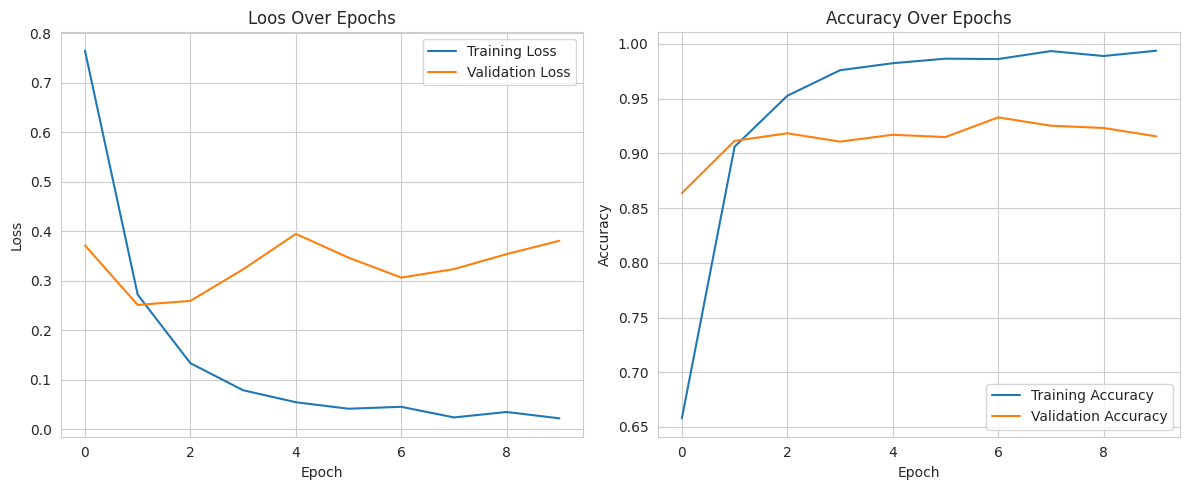

In [41]:
# plot Training and Validation Los and Accuracy
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loos Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

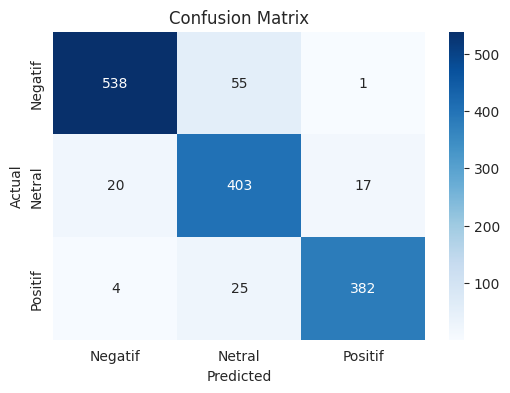

In [42]:
# Counfusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [43]:
x = texts
y = encoded_labels

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(x, y, data.index, test_size=0.2, random_state=42)

# Gunakan Indexs test untuk mengambil data asli
data_test = data.iloc[indices_test].reset_index(drop=True)

predictions = pd.DataFrame({
    'stemming_data': data_test['stemming_data'],
    'Actual': label_encoder.inverse_transform(y_test),
    'Predicted': label_encoder.inverse_transform(y_pred_classes)
})

# Simpan ke Csv
predictions.to_csv('Hasil_predictions_lstm.csv', index=False)
predictions.head()


,stemming_data,Actual,Predicted
0,sih update versi logout pas masuk susah banget,Netral,Netral
1,guna obat faskes faskes rujuk singkron dokter ...,Netral,Netral
2,terima kasih rubah alamat tinggal aplikasi kar...,Positif,Positif
3,call ya pura dengar kali telfon kayak malas se...,Netral,Positif
4,logout,Netral,Netral


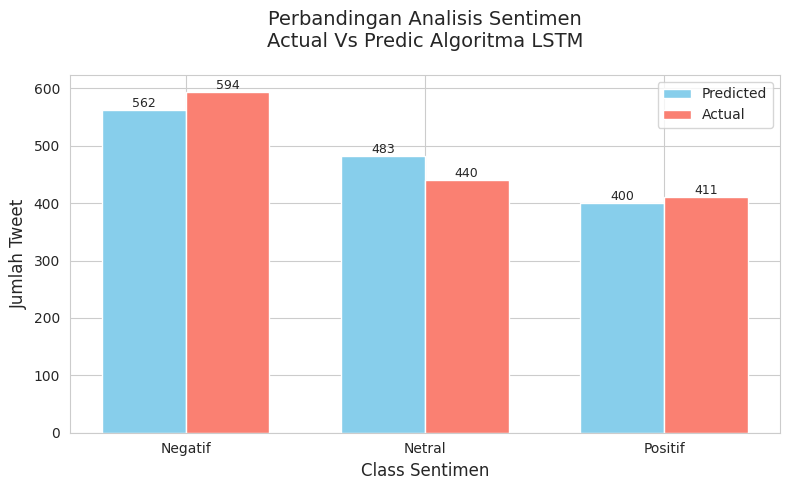

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

predicted_counts = predictions['Actual'].value_counts().sort_index()
actual_counts = predictions['Predicted'].value_counts().sort_index()

comparison_df = pd.DataFrame({
    'Predicted': actual_counts,
    'Actual': predicted_counts
}).fillna(0)

# Buat Plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 5))

bar_width = 0.35
index = range(len(comparison_df))

# Plot Actual
ax.bar([i - bar_width/2 for i in index], comparison_df['Predicted'], width=bar_width, label='Predicted', color='skyblue')

# Plot Predicted
ax.bar([i + bar_width/2 for i in index], comparison_df['Actual'], width=bar_width, label='Actual', color='salmon')

# Set label dan tittle
ax.set_xlabel('Class Sentimen', fontsize=12)
ax.set_ylabel('Jumlah Tweet', fontsize=12)
ax.set_title('Perbandingan Analisis Sentimen\nActual Vs Predic Algoritma LSTM', fontsize=14, pad=20)
ax.set_xticks(index)
ax.set_xticklabels(comparison_df.index)
ax.legend()

# Tambahkan Jumlah diatas bar
for i in index:
    actual = comparison_df['Predicted'].iloc[i]
    predicted = comparison_df['Actual'].iloc[i]
    ax.text(i - bar_width/2, actual + 0.01, int(actual), ha='center', va='bottom', fontsize=9)
    ax.text(i + bar_width/2, predicted + 0.01, int(predicted), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**WORDCLOUD**

In [45]:
import pandas as pd

data = pd.read_csv("Hasil_Labeling_Data.csv")
data.head(5)

,stemming_data,score,Sentiment
0,guna ubah data,0,Netral
1,good,1,Positif
2,guna,1,Positif
3,bagus banget,1,Positif
4,bantu,0,Netral


In [46]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_negatif = data[data['Sentiment'] == 'Negatif']['stemming_data'].str.cat(sep=' ')
sentimen_positif = data[data['Sentiment'] == 'Positif']['stemming_data'].str.cat(sep=' ')
sentimen_netral = data[data['Sentiment'] == 'Netral']['stemming_data'].str.cat(sep=' ')

In [47]:
# Fungsi untuk membuat dan menanmpilkan Wordcloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

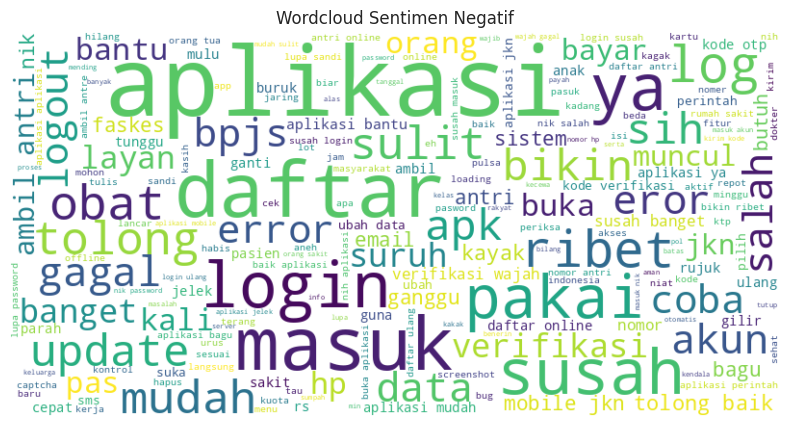

In [48]:
# Membuat WordCloud untuk sentimen Negatif
create_wordcloud(sentimen_negatif, 'Wordcloud Sentimen Negatif')

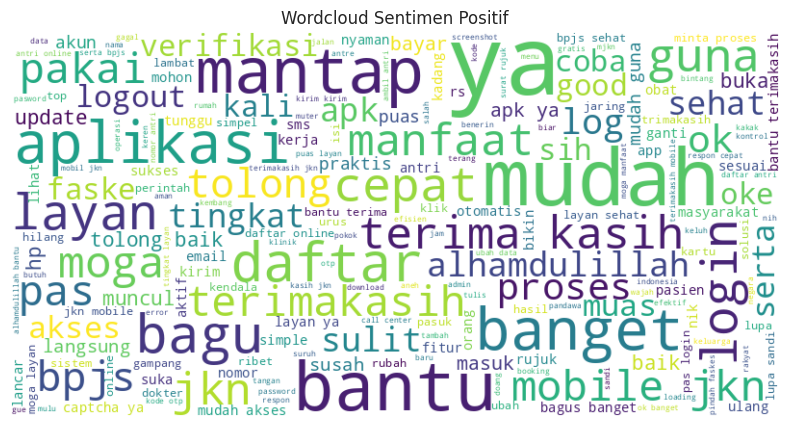

In [49]:
# Membuat WordCloud untuk sentimen Positif
create_wordcloud(sentimen_positif, 'Wordcloud Sentimen Positif')

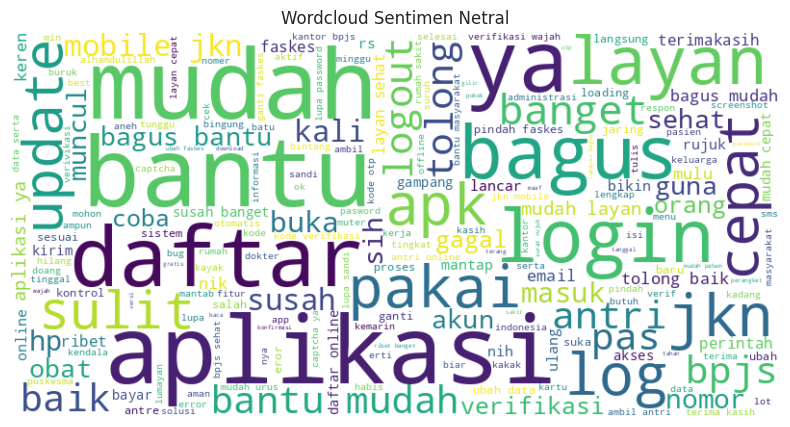

In [50]:
# Membuat WordCloud untuk sentimen Positif
create_wordcloud(sentimen_netral, 'Wordcloud Sentimen Netral')

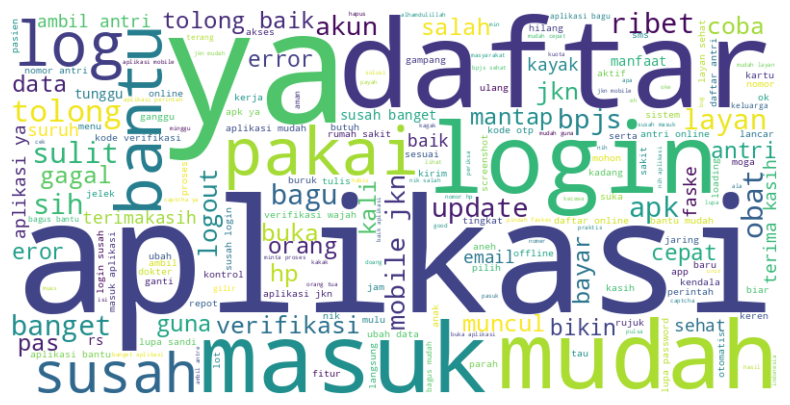

In [51]:
# Menggabungkan texs dalam kolom 'translated_steming_data' menjadi satu string
text = ' '.join(data['stemming_data'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Membuat Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**RATING**

In [52]:
import pandas as pd

data = pd.read_csv("Hasil_Preprocessing_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7288 entries, 0 to 7287
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            7288 non-null   int64 
 1   Review Text       7288 non-null   object
 2   cleaning          7264 non-null   object
 3   case_folding      7264 non-null   object
 4   normalisasi       7261 non-null   object
 5   tokenize          7288 non-null   object
 6   stopword removal  7288 non-null   object
 7   stemming_data     7224 non-null   object
dtypes: int64(1), object(7)
memory usage: 455.6+ KB


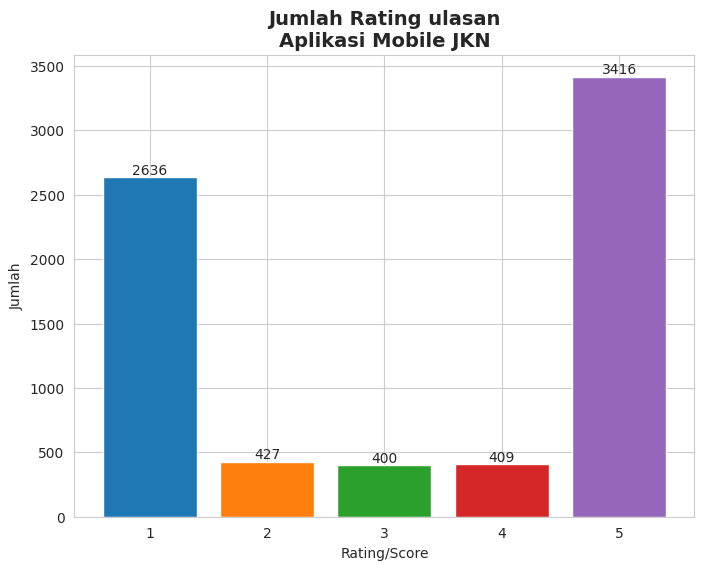

In [53]:
import matplotlib.pyplot as plt

rating_counts = data['rating'].value_counts()
rating_counts = rating_counts.sort_index()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.title('Jumlah Rating ulasan\nAplikasi Mobile JKN', fontsize=14, fontweight='bold')
plt.xlabel('Rating/Score')
plt.ylabel('Jumlah')
plt.xticks(rating_counts.index)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height , str(int(height)), ha='center', va='bottom')

plt.show()
#